# Counting Rainy Days in Seattle
Imagine you have a series of data that represents the amount of precipitation (=amount of rain) each day for a year in a given city. For example, here we'll load the daily rainfall statistics for the city of Seattle in 2014, using Pandas.

> Note. In the following data file is located in sub-directory ./data

## Part 1
Read data in and plot some general info.

In [1]:
# TODO: print first 4 lines from the file (check that the file exists)
!powershell -Command "Get-Content data/seattle2014.csv | Select-Object -First 4"

STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999


In [7]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
# TODO: convert mm to inches and print shape (should be 365)
rainfall_inches = rainfall * 0.0393701
rainfall_inches.shape

(365,)

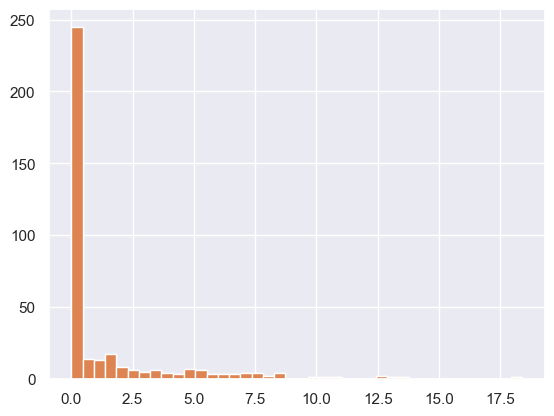

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

# TODO: plot histogram (use 40 bins)
plt.hist(rainfall_inches, bins=40)
plt.show()

This histogram gives us a general idea of what the data looks like: despite its reputation, the vast majority of days in Seattle saw near zero measured rainfall in 2014. But this doesn’t do a good job of conveying some information we’d like to see: for example, 

- How many rainy days were there in the year? 
- What is the average precipitation on those rainy days? 
- How many days were there with more than half an inch of rain?

## Part 2
Using NumPy boolean operations calculate some statistical info defined.

In [21]:
# TODO: print statistical info:
# - nbr of days with and without rain
print(f"Nr of rainy days: {np.sum(rainfall_inches > 0)}")
print(f"Nr of days without rain: {np.sum(rainfall_inches == 0)}")
# - nbr of days with more than 0.5 inches rain
print(f"Nr of days with more than 0.5 inches rain: {np.sum(rainfall_inches > 0.5)}")
# - nbr of days with rain less than 0.2 inches
print(f"Nr of days with rain less than 0.2 inches: {np.sum((rainfall_inches > 0) & (rainfall_inches < 0.2))}")

Nr of rainy days: 150
Nr of days without rain: 215
Nr of days with more than 0.5 inches rain: 120
Nr of days with rain less than 0.2 inches: 23


In [61]:
# TODO: construct mask for rainy days and summer days
rainy_mask = (rainfall_inches > 0)
summer_mask = (np.arange(1, 366) >= 172) & (np.arange(1, 366) <= 264)
# - printout median percip of rainy days
print(f"Median percip of rainy days {np.median(rainfall_inches[rainy_mask])}")
# - printout median percip of summer days
print(f"Median percip of summer days {np.median(rainfall_inches[summer_mask]):.2f}")
# - printout max percip of summer days
print(f"Max percip of summer days {np.max(rainfall_inches[summer_mask])}")
# - printout median percip of non-summer rainy days
print(f"Max percip of non-summer rainy days {np.median(rainfall_inches[rainy_mask & ~summer_mask])}")

Median percip of rainy days 1.9488199499999999
Median percip of summer days 0.00
Max percip of summer days 8.5039416
Max percip of non-summer rainy days 2.0078750999999997
